# Importing the necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Diabetes_predict.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Visualizing the data

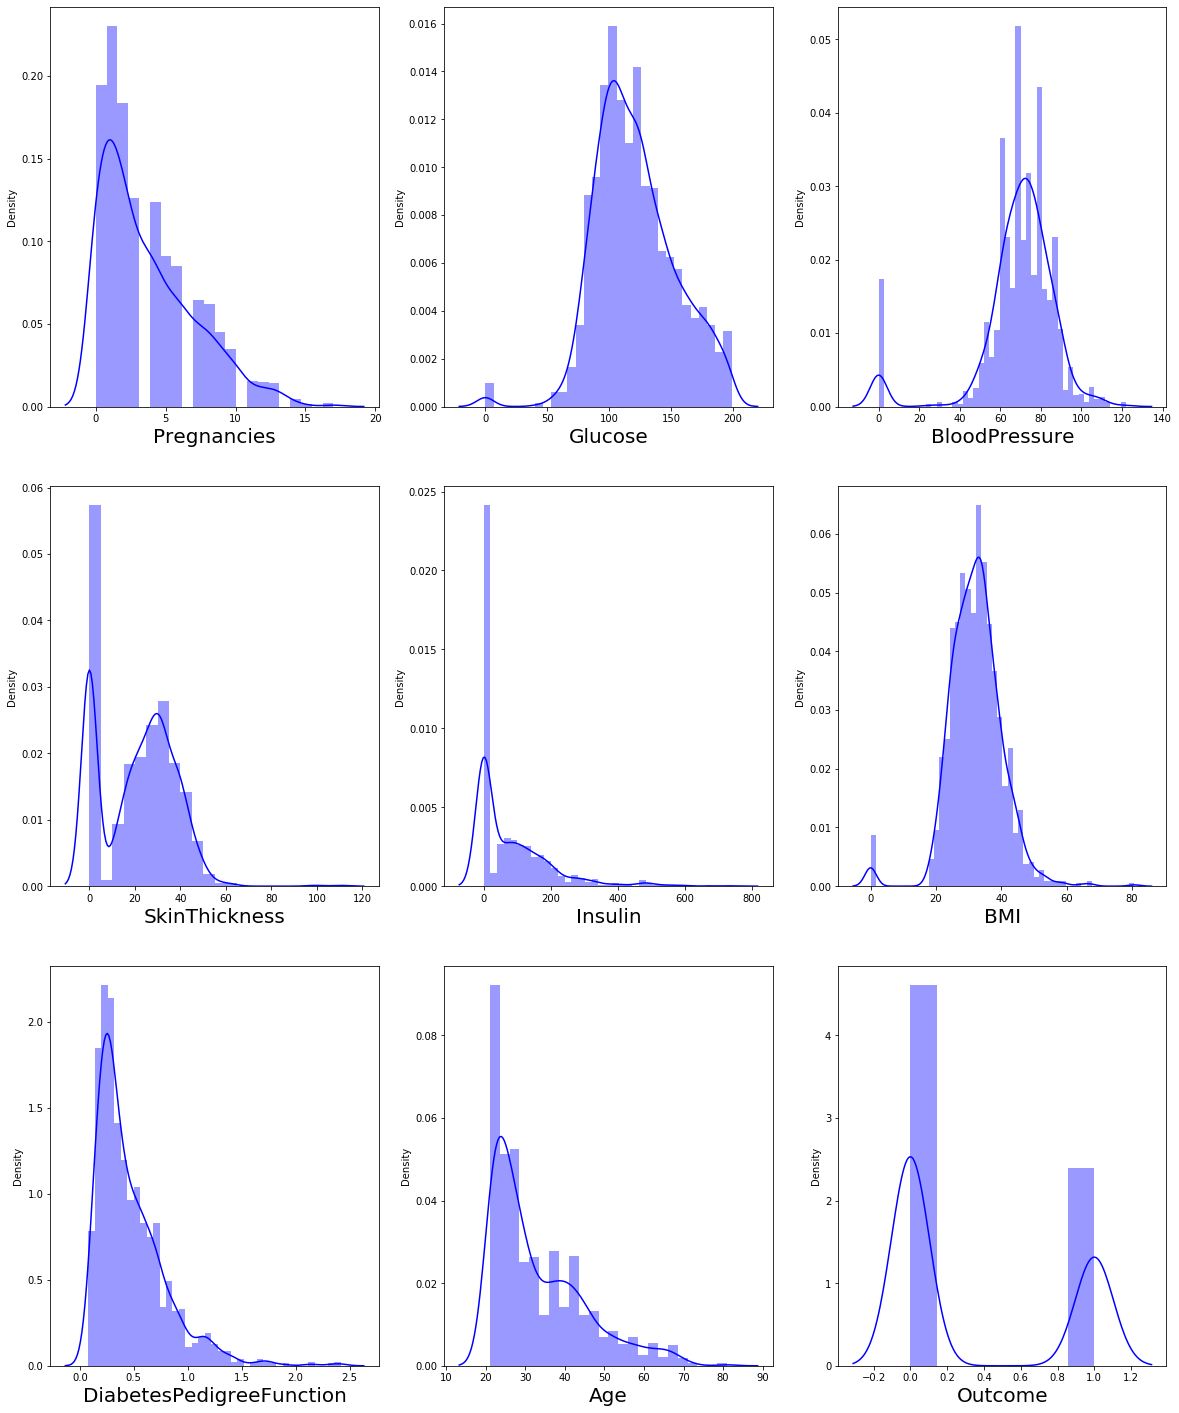

In [4]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column], color='Blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Replace 0 with the value of mean in data

In [5]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

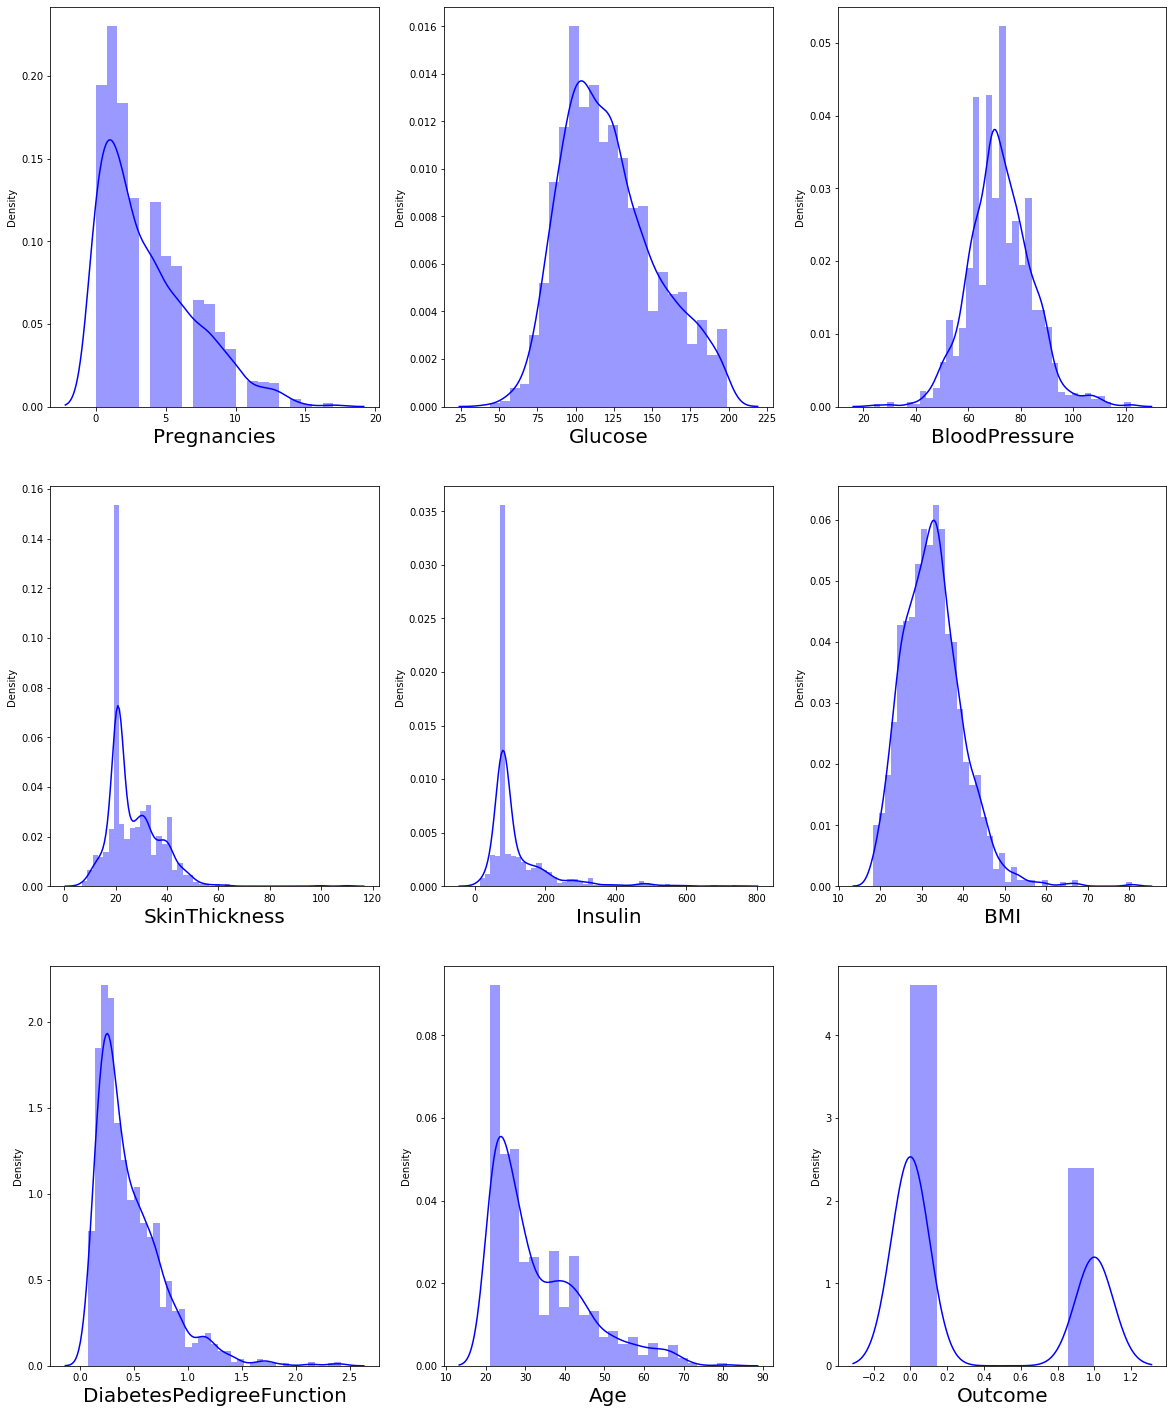

In [7]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column], color='Blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [8]:
q=data['Pregnancies'].quantile(0.98)
data_cleaned=data[data['Pregnancies']<q]

In [9]:
q=data['BMI'].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned['BMI']<q]

In [10]:
q=data['SkinThickness'].quantile(0.95)
data_cleaned=data_cleaned[data_cleaned['SkinThickness']<q]

In [11]:
q=data['Insulin'].quantile(0.98)
data_cleaned=data_cleaned[data_cleaned['Insulin']<q]

In [12]:
x=data.drop(columns = ['Outcome'])
y=data['Outcome']

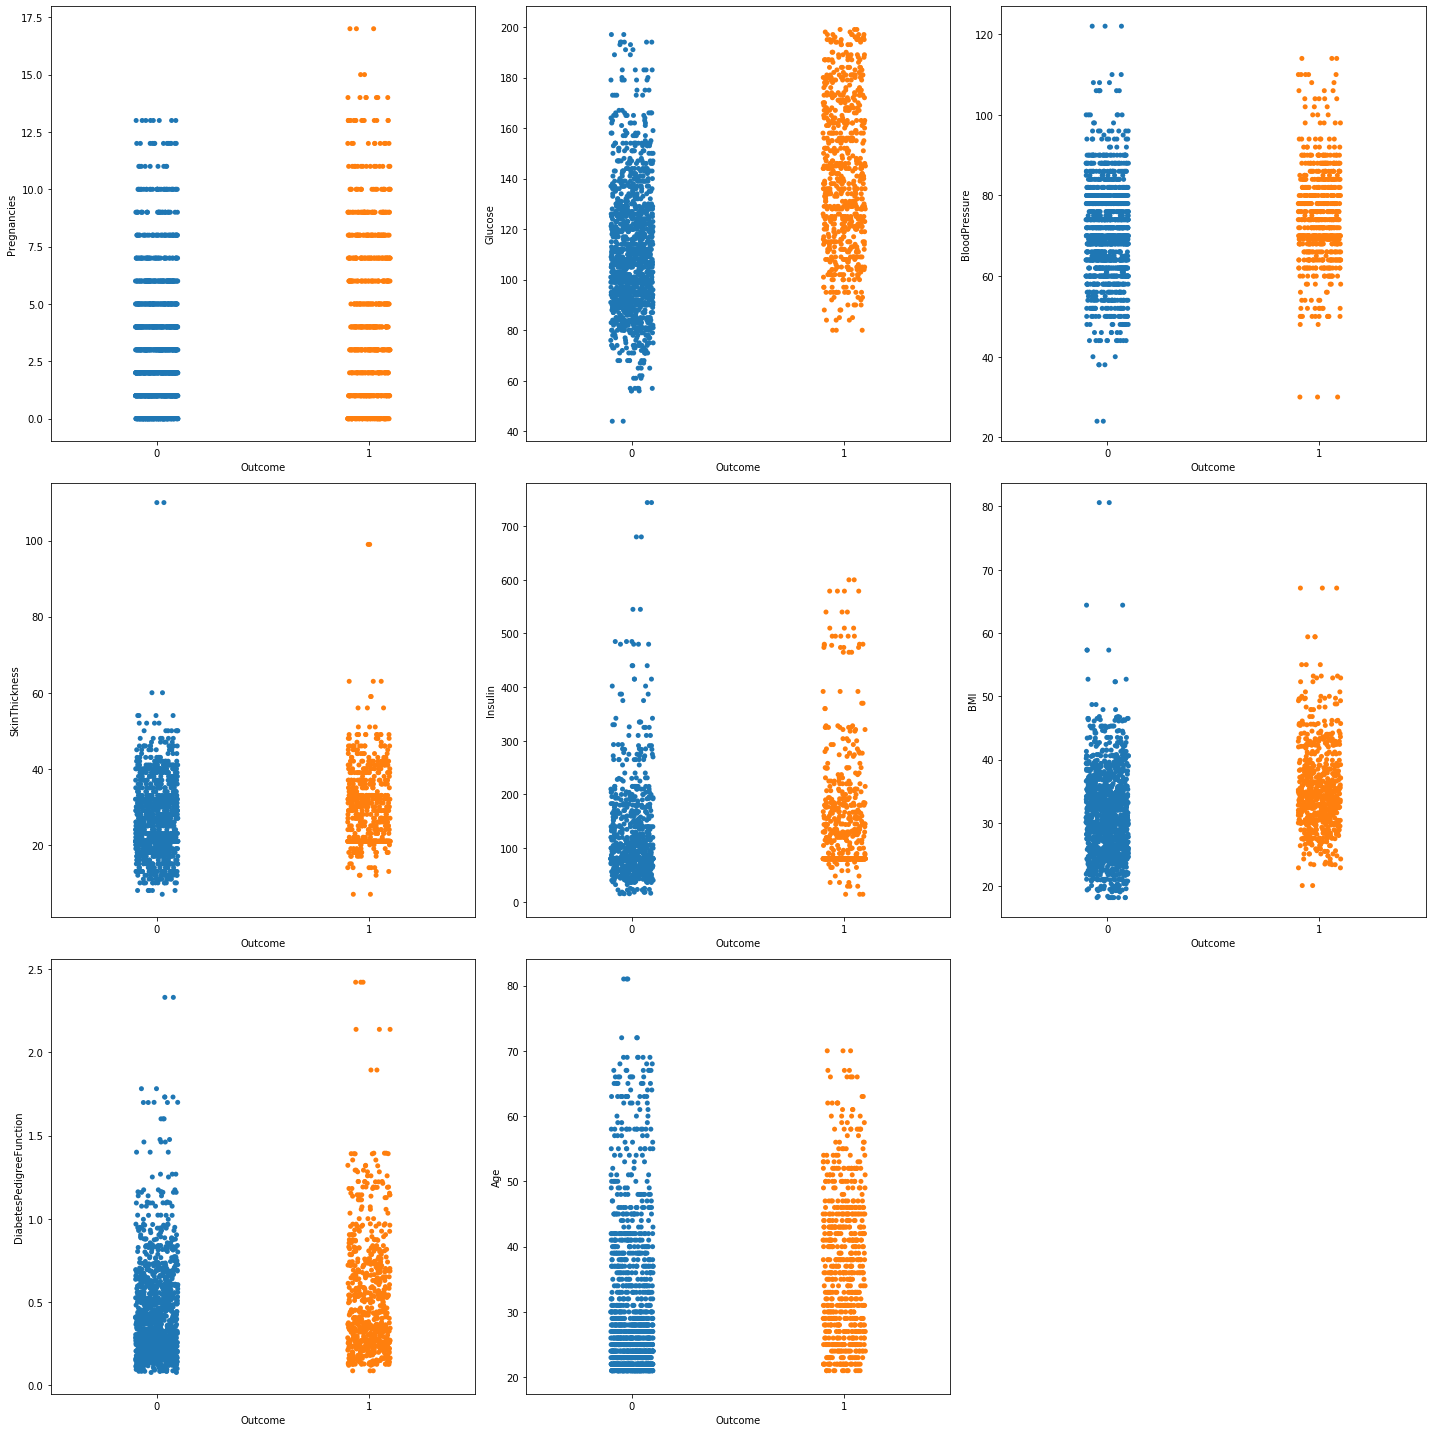

In [13]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [14]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [15]:
x_scaled

array([[-0.5153943 ,  0.52512783, -0.85720977, ...,  0.13303093,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.2438823 ,  0.81424543, ...,  0.77293845,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.75444396, -0.26004061, ...,  1.60760043,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.21112285,  0.47995439, ..., -0.20083386,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.23029281,  3.15428271, ...,  4.793227  ,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.34216064, -0.02148217, ..., -0.35385523,
         0.23516743, -0.68659705]])

# Variance Inflation Factor

In [16]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [17]:
vif["Feature"]=x.columns

In [18]:
vif

,VIF,Feature
0,1.416015,Pregnancies
1,1.328924,Glucose
2,1.220447,BloodPressure
3,1.421399,SkinThickness
4,1.267217,Insulin
5,1.490591,BMI
6,1.049461,DiabetesPedigreeFunction
7,1.603222,Age


# Training the model

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [20]:
x_train.shape

(1500, 8)

In [21]:
x_test.shape

(500, 8)

In [22]:
y_train.shape

(1500,)

In [23]:
y_test.shape

(500,)

# Logistic Regression

In [24]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [26]:
accuracy=accuracy_score(y_test,y_pred)

In [27]:
accuracy  #74% accuracy in data

0.746

# Confusion Matrix

In [28]:
conf_mat=confusion_matrix(y_test,y_pred)

In [29]:
conf_mat

array([[275,  45],
       [ 82,  98]], dtype=int64)

In [30]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

# Accuracy

In [31]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)

In [32]:
Accuracy

0.746

# Precision

In [33]:
Precision=true_positive/(true_positive+false_positive)

In [34]:
Precision

0.859375

# Recall

In [35]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.7703081232492998

# F1 Score

In [36]:
F1_Score=2*(Recall*Precision)/(Recall+Precision)

In [37]:
F1_Score

0.8124076809453472

# Area Under Curve

In [38]:
auc=roc_auc_score(y_test,y_pred)

In [39]:
auc

0.7019097222222221

# ROC

In [40]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [41]:
fpr

array([0.      , 0.140625, 1.      ])

In [42]:
tpr

array([0.        , 0.54444444, 1.        ])

In [43]:
thresholds

array([2, 1, 0], dtype=int64)

# Curve Plot

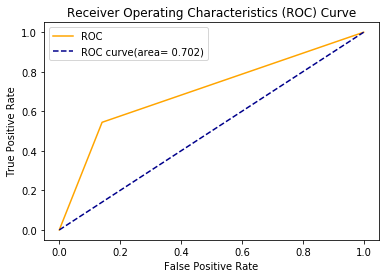

In [44]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0, 1],[0, 1],color='darkblue',linestyle='--',label='ROC curve(area= %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()